In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [5]:
from IPython.display import Image

# Word2Vec

 ># 딥러닝 기반의 워드 임베딩 방법
 <li> - 어떤 단어들이 함께(이웃해서) 쓰였다면 그 단어들은 의미 상 가까이 있다는 Idea에서 출발
    <ol>-"수박은 사과는 과일이다." ->  사과는 수박과 과일은 의미 상 가깝다.</ol>
    <ol>- 그렇다면 의미가 가까운 단어들을 Vector space 에서 Embedding 시켜보자</ol>
    <ol>- 어떻게? 의미가 가까운 단어들의 내적값이 크도록, 멀수록 작도록</ol>
    <ol>- 결국 비슷한 단어들끼리의 코사인 유사도를 높이는 과정이라고 볼 수 있다.</ol>
</li>

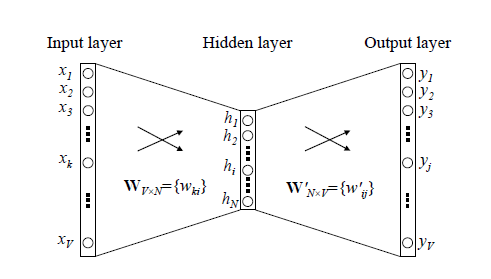

In [4]:
Image("/Users/maegbug/Downloads/simple_model.png")

### 가장 기초적인 Embedding 방법
위 그림은 가장 간단한 word2vec 모형으로 1 input layer, 1 hidden layer, 1 output layer로 이루어진다.<br>
Input layer에는 다음과 같은 Bag of word 로 임베딩된 One-Hot-Embedding 된 Word Vector가 들어가고,<br> output layer에는 그 단어와 인접한 1개의 단어가 온다 앞에 단어를 쓸것인가 뒤에 오는 단어를 쓸 것인가는 상황에 따라 다르다.<br> 실은 애초에 이 모델을 쓰진 않는다.. 다만 이 모델을 알면 다른 모델을 이해하는데 상당히 편한다 <br><br>
[0, 0, 0, 1, 0, ...,0]<br><br>
예를들어 100개의 단어를 사용한 글이 있다고 가정하고 이를 임베딩 하고 싶다면 input layer에는 1이 하나만 들어가고 나머지가 0으로 구성된 100차원 벡터가 input 될 것이다.<br><br>
$x_1$ = [1, 0, 0, 0, 0, ...,0]<br>
$x_2$ = [0, 1, 0, 0, 0, ...,0]<br>
$x_3$ = [0, 0, 1, 0, 0, ...,0]<br>
...<br>
$x_{100}$ = [0, 0, 0, 0, 0, ...,1]<br><br>
이렇게 구성된다.<br>
<B>정말</B> 간단하다.<br>

그렇다면 Input layer to hidden layer 를 잇는 Weight Vector는 $W_{100 * N}$ 이 된다. 이때 N은 단어를 임베딩하고 싶은 차원이 될 것이다.<br><br>
3차원으로 Embedding 하고 싶다면 $W_{100 * 3}$,<br> 4차원으로 Embedding 하고 싶다면 $W_{100 * 4}$<br>... 요렇게<br><br>
모든 딥러닝/머신러닝 기법과 동일하게 차원이 높을수록 표현력은 좋아지지지만 Curse of dimension에 빠질 수 있다는 점을 유념하자. 항상 input 데이터의 양과 질을 고려해야한다.<br>

$h = W^Tx$
이렇게 계산하면 h는 $n\cdot1$ 차원의 벡터가 된다. 그리고 이 벡터가 어떤 단어를 n차원 vector space으로 embedding 된 결과이다.<br>
이쯤되면 눈치 챘겠지만, h는 $W_{100 * N}$의 row vector일 뿐이다. activation function도 없다. 예를들어 1번째 단어의 h는 $W_{100 * N}$ 의 1번째 row vector 이다.

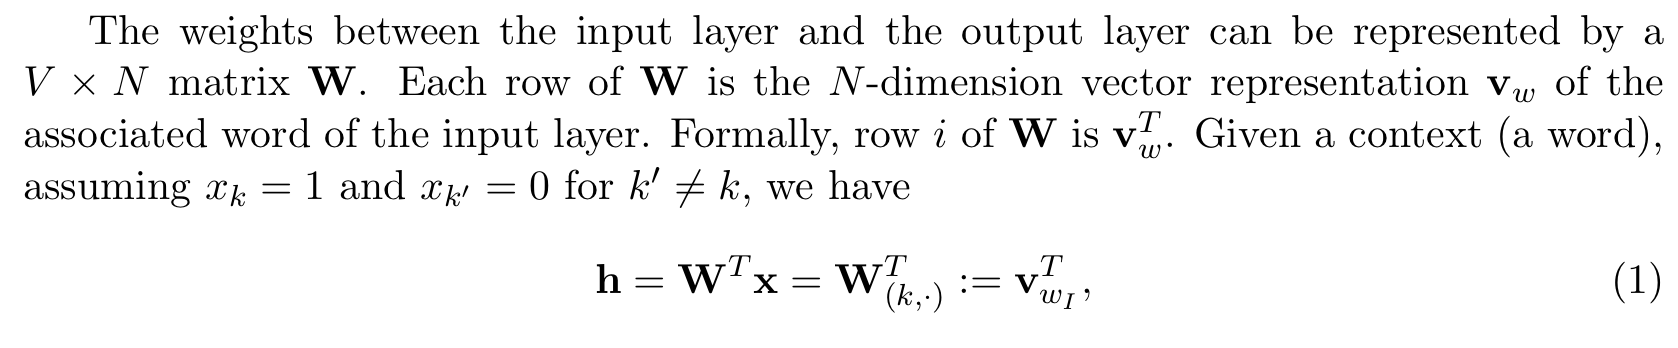

In [7]:
Image("/Users/maegbug/Downloads/word2vec_2.png")

논문에서 알 수 있듯이 $h$는 $x$의 $k$번째 element만이 1인 input을 넣었을 때, 이 word의 embedding 된 h는 $W^T_{(k,.)}$이다.<br>즉 $W$의 $k$번째 row 이다. 논문에서는 이를 "copying the k-th row of W to h." 라 표현하고 몇몇 사람들은 hidden layer(=$h$)를 projection layer라 말하기도 한다.

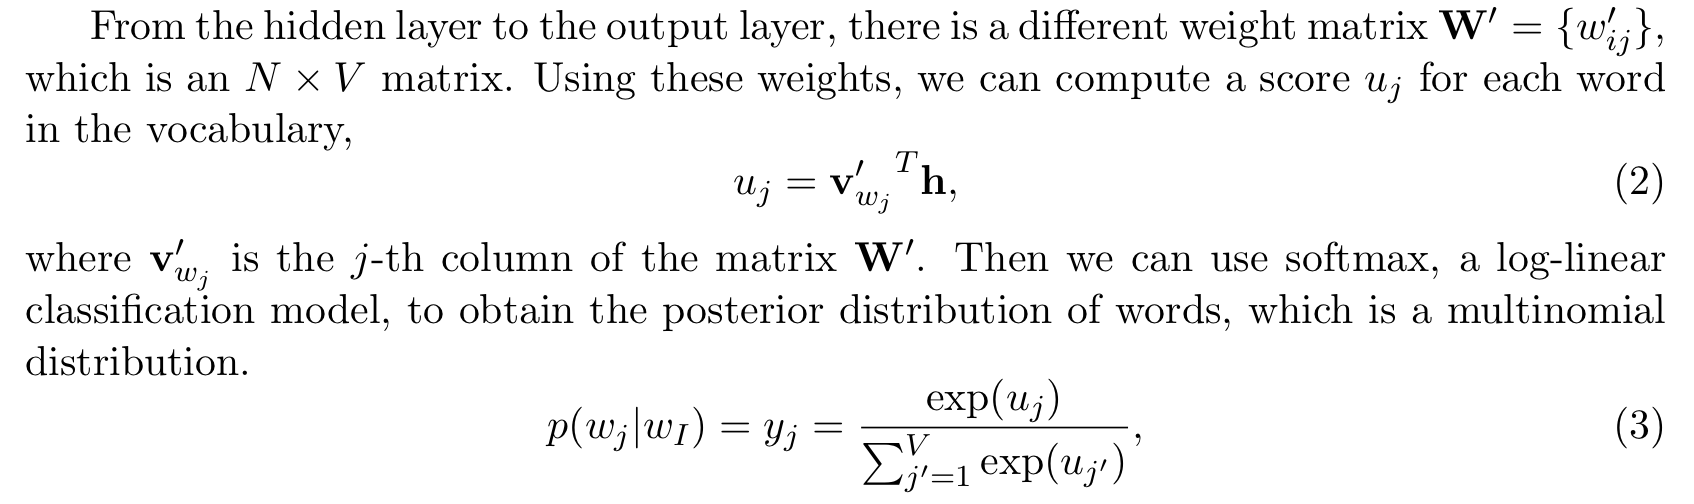

In [11]:
Image("/Users/maegbug/Downloads/word_3.png")

그렇다면 hidden 에서 output layer로는 어떻게 값들이 전달될까?<br>
이때는 일반적인 NN에서의 output layer와 유사하다.<br>
transpose 된 weight vector에 hidden vector를 곱한 후 softmax 함수를 통과시킨값을 특정 단어가 input 됬을 때 다른 단어가 output 될 확률을 구해준다.<br><br>
## $u = W'h$<br>
## $p(w_j|w_I) = y_j = \frac{exp(u_j)}{\Sigma^v_{j'=1}exp(u_j')}$<br>



논문에는 나오지 않지만 이 의미를 잘 생각해보자. 이 확률값은 무엇이란 말인가?<br>
embedding 된 word와 어떤 weight를 내적한다는 의미는 코사인 유사도를 보겠다는 것이다.<br>
그렇다면, $W'$은 무엇인가? 단순 Weight matrix는 아니다. 자세한 내용은 아래의 식을 살펴본 다음에 알아보자<br>

## $p(w_j|w_I) = y_j = \frac{exp(u_j)}{\Sigma^v_{j'=1}exp(u_j')} = \frac{exp(v`_{w_j}^T\cdot v_{w_I})}{\Sigma^v_{j'=1}exp(v`_{w_j'}^T\cdot v_{w_I})}$

결국 $p(w_j|w_I)$ 는 embedding 된 input vector에 $W'^T$의 j번째 row vector를 내적한 값이다.<br> 즉 I 가 나타내는 word와 j가 나타내는 word가 인접해 있다면 <br>
## ${exp(v`_{w_j}^T\cdot v_{w_I})^T}$<br>
는 큰 값을 가져야 하고, <br> 
## $\Sigma^v_{j'=1}exp(v`_{w_j'}^T\cdot v_{w_I})^T$ <br>
은 작은 값을 가져야하고 이를 수식으로 표현하면 다음과 같다.<br>
<b>즉, 인접해있는 word의 내적값은 크게, 아니면 작게 해야한다.</b><BR>
우리가 해결해야 하는 문제는 다음과 같다.

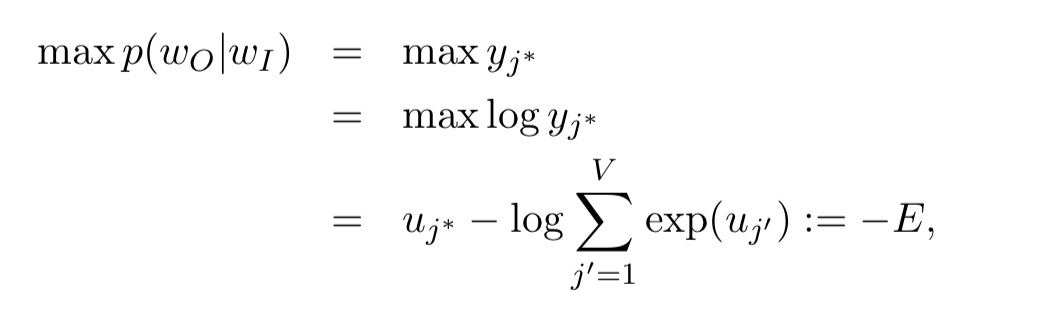

In [14]:
Image("/Users/maegbug/Downloads/word4.png")

위 식에서 최소화할 대상은 E 이다. $max$ 밑에 $u_j$가 있다고 생각하면 편하다. 그런데 $u_j$는 정의에 의해 다음과 같다.<br>
## $u_j = v`_{w_j}^Th$<br>
근데 여기서 h는 $W^T$의 어떤 row vector이다.

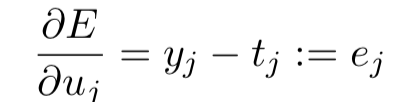

In [15]:
Image("/Users/maegbug/Downloads/word5.png")

위 식에서 $t_j$는 정답일때만 1을 갖는 지시함수이다. 즉 $e_j$는 j번째 output layer에 대한 error를 의미하고 global gradient이다.

In [9]:
Image("C:/Users/user/Desktop/local_gradient")

TypeError: a bytes-like object is required, not 'str'

TypeError: a bytes-like object is required, not 'str'

<IPython.core.display.Image object>

위식은 error에 대한 $w'_{ij}$ 의 gradient이다. chain rule을 사용한다.<br>
알다시피 $w'$와 $h_i$는 곱연산이므로 그래프 상에서 gradient는 서로에 바꿔줘 global gradient에 곱하기만하면 된다.

그리고 SGD를 활용하여 weight 업데이트를 다음과 같이 할 수 있다.

두 식은 같은 것이나 밑의 식은 output layer weight를 한번에 업데이트 하는 것을 의미한다.

output layer에서 $v'_{wj}$를 생각해보자. 만약 $y_j$가 $t_j$보다 크다면, 즉 실제 유사도 보다 크게 판단하고 있다면, $e_j$값은 양의 방향으로 커질 것이다.<br>
따라서 위 식에 의해서 h와의 거리는 멀어지게 된다. 즉 원래 단어가 임베딩된 것과 멀어진다는 것이다.<br>
만약 $t_j$가 $y_j$보다 작다면 $e_j$값은 음의 방향으로 커질 것이고 원래 단어가 임베딩된 곳과 가까워질 것이다.<br>
이를 반복해서 수행한다면 인접해 있는 단어들은 매우 가깝게 위치할 것이다.<br><br>
환기해야할 부분은 h와 $v'_{wj}$가 가까워지는 것이다. 아직 input -> hidden은 살펴보지 않았다.

위식에서 먼저 상기해야할 것은 $h_i$로 gradient를 구한다는 $W_{\cdot i}$로 gradient를 구한다는 것과 동일하다.(transpose 이므로)<br>
마찬가지로 곱연산 이므로 서로 곱해주는 것을 바꿔서 곱해준다.<br>
여기서 아래식만 풀어주면 된다. 마찬가지로 곱연산이므로 바꿔서 곱해준다.<br>
이때 $EH_i$는  $EH$는 벡터이다.

아래 수식을 보면 결국 $v_{wI}$ 는 $W$의 input 에 해당하는 단 하나의 row이고, 이때 W의 row vector 중 편미분 값이 0이 안되는 유일한 row이다.

이때 EH는 결국 error $e_{j} = y_{j} - t_{j}$의 벡터일 뿐이고,<br> output 단계에서 $y_j$ 가 $t_j$보다 크다면 $w_{I}$는 output vector 인 $w_{j}$와 멀어질 것이고, 반대의 경우 가까워질 것이다.<br>

skipgram